### Belahsen Ymane

# task1: Prediction using Supervised ML


* predict the percentage of a student based on n of study hour

## Step1 : Database extraction and importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [3]:
url="http://bit.ly/w-data"
dataset= pd.read_csv(url)
print("dataset import")
dataset.head()

dataset import


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## STEP2 : selection of the columns of the characteristic variables(X) and the column of the variable to be predicted (Y)

In [7]:
X= dataset[['Hours']]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [8]:
Y= dataset[['Scores']]
Y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


## step3: splitting the data into a training set and a test set

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=100)
print('training data:' ,X_train.shape)
print('test data:' ,X_test.shape)

training data: (20, 1)
test data: (5, 1)


## step4: construction of the linear regression model

In [41]:
model=LinearRegression()

## step5: train the model using fit() method

In [42]:
model.fit(X_train,Y_train)

LinearRegression()

## step6: evaluate the performance of the model on the training database

In [43]:
print("the performance of the model on the training database", model.score(X_train, Y_train))

the performance of the model on the training database 0.9519568836485192


In [45]:
print(model.intercept_)

[1.98942311]


In [46]:
model.coef_

array([[9.83544438]])

In [48]:
coefDataset= pd.DataFrame(model.coef_,X.columns, columns=["coefficients"])

In [49]:
coefDataset

,coefficients
Hours,9.835444


## step7: prediction using test data

In [53]:
prediction=model.predict(X_test)

In [54]:
print("the performance of the model on test database",model.score(X_test,Y_test))

the performance of the model on test database 0.9050356232459791


In [55]:
prediction

array([[28.54512294],
       [39.36411177],
       [34.44638957],
       [60.01854497],
       [16.74258969]])

In [73]:
predictions=pd.DataFrame(prediction)

In [74]:
predictions

,0
0,28.545123
1,39.364112
2,34.446390
3,60.018545
4,16.742590


In [56]:
Y_test

,Scores
9,25
22,35
13,42
11,62
5,20


In [80]:
Y_test-prediction

,Scores
9,-3.545123
22,-4.364112
13,7.553610
11,1.981455
5,3.257410


## step8: plotting

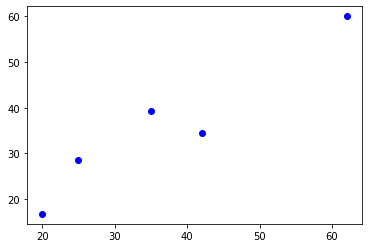

In [81]:
plt.scatter(Y_test,predictions, c='b')

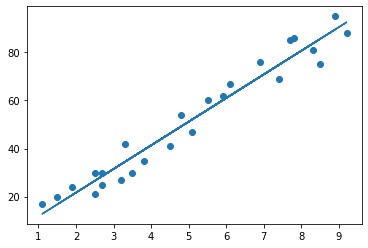

In [61]:
line= model.coef_*X+model.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [93]:
hours=9.25
pred=model.predict([[hours]])
print('number of hours= ',hours)
print('predicted score ',pred[0])

number of hours=  9.25
predicted score  [92.96728365]


In [101]:
 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, prediction)) 

Mean Absolute Error: 4.140342096254413
